In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.power import TTestIndPower, TTestPower
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn import neighbors, datasets, preprocessing, metrics





# Data import/Manipulation 

In [2]:
# from kaggle this is a dataset of MyAnimeList.net of popular anime

# exporting csv file to a DataFrame only using columns listed
data = pd.read_csv("myAnimelist-No_Hentai.csv", usecols=['name','type','source','episodes','duration','rating', 'score', 'scored_by','rank','popularity','members', 'favorites'])
data_number_set = pd.read_csv("myAnimelist-No_Hentai.csv", usecols=['episodes', 'score', 'scored_by','rank','popularity','members', 'favorites'])

# dropping all null values
data.dropna(inplace = True) 


In [3]:
data

,name,type,source,episodes,duration,rating,score,scored_by,rank,popularity,members,favorites
0,Cowboy Bebop,TV,Original,26,0:24:00,R - 17+ (violence & profanity),8.81,405664,26,39,795733,43460
1,Cowboy Bebop: Tengoku no Tobira,Movie,Original,1,1:55:00,R - 17+ (violence & profanity),8.41,120243,164,449,197791,776
2,Trigun,TV,Manga,26,0:24:00,PG-13 - Teens 13 or older,8.30,212537,255,146,408548,10432
3,Witch Hunter Robin,TV,Original,26,0:25:00,PG-13 - Teens 13 or older,7.33,32837,2371,1171,79397,537
4,Bouken Ou Beet,TV,Manga,52,0:23:00,PG - Children,7.03,4894,3544,3704,11708,14
5,Hachimitsu to Clover,TV,Manga,24,0:23:00,PG-13 - Teens 13 or older,8.12,57065,419,536,172274,3752
6,Hungry Heart: Wild Striker,TV,Manga,52,0:23:00,PG-13 - Teens 13 or older,7.67,9307,1186,3124,17145,210
7,Initial D Fourth Stage,TV,Manga,24,0:27:00,PG-13 - Teens 13 or older,8.23,42555,298,1262,73438,635
8,Monster,TV,Manga,74,0:24:00,R+ - Mild Nudity,8.69,131233,49,156,394387,19188
9,Naruto,TV,Manga,220,0:23:00,PG-13 - Teens 13 or older,7.90,716412,705,10,1091313,39356


### Creating Dummies for non-numerical data (for columns : Type, Source, Rating)

In [4]:
le = preprocessing.LabelEncoder()
# dataframe with dummies
data_le = data.copy()

# Created dummies for type column
data_le.type = le.fit_transform(data_le.type)
le.fit_transform(data_le.type)


# Made tuple for graphing labels instead of numerical data
data_list_type = ('Movie', 'Music', 'ONA', 'OVA', 'Special','TV')                           # data.type.unique()

In [5]:
# Created dummies for source column
data_le.source = le.fit_transform(data_le.source)
le.fit_transform(data_le.source)


# Made tuple for graphing labels instead of numerical data
data_list_source = ('4-koma manga', 'Book', 'Card game', 'Digital manga', 'Game', 
                    'Light novel', 'Manga', 'Music','Novel','Original', 'Other', 
                    'Picture book', 'Radio', 'Unknown', 'Visual novel','Web manga')          # data.source.unique()

In [6]:
# Created dummies for rating column
data_le.rating = le.fit_transform(data_le.rating)
le.fit_transform(data_le.rating)


# Made tuple for graphing labels instead of numerical data
data_list_rating = ('G - All Ages', 'None','PG - Children','PG-13 - Teens 13 or older',
                    'R - 17+ (violence & profanity)', 'R+ - Mild Nudity')                   # data.rating.unique()

In [7]:
data_le = data_le.drop('duration', axis = 'columns')

In [8]:
data_le

,name,type,source,episodes,rating,score,scored_by,rank,popularity,members,favorites
0,Cowboy Bebop,5,9,26,4,8.81,405664,26,39,795733,43460
1,Cowboy Bebop: Tengoku no Tobira,0,9,1,4,8.41,120243,164,449,197791,776
2,Trigun,5,6,26,3,8.30,212537,255,146,408548,10432
3,Witch Hunter Robin,5,9,26,3,7.33,32837,2371,1171,79397,537
4,Bouken Ou Beet,5,6,52,2,7.03,4894,3544,3704,11708,14
5,Hachimitsu to Clover,5,6,24,3,8.12,57065,419,536,172274,3752
6,Hungry Heart: Wild Striker,5,6,52,3,7.67,9307,1186,3124,17145,210
7,Initial D Fourth Stage,5,6,24,3,8.23,42555,298,1262,73438,635
8,Monster,5,6,74,5,8.69,131233,49,156,394387,19188
9,Naruto,5,6,220,3,7.90,716412,705,10,1091313,39356


## Correlation

In [9]:

data_le_predictors = data_le.iloc[:,1:-1]
corr= data_le_predictors.corr()
corr

,type,source,episodes,rating,score,scored_by,rank,popularity,members
type,1.000000,-0.102072,0.176927,0.098062,0.027355,0.120017,-0.050781,-0.168389,0.143874
source,-0.102072,1.000000,0.029282,-0.249729,-0.334873,-0.181637,0.390949,0.458842,-0.205016
episodes,0.176927,0.029282,1.000000,-0.109389,-0.012082,0.004470,0.029014,0.074446,0.002410
rating,0.098062,-0.249729,-0.109389,1.000000,0.330784,0.270104,-0.421295,-0.604778,0.306479
score,0.027355,-0.334873,-0.012082,0.330784,1.000000,0.405655,-0.843764,-0.687851,0.443969
scored_by,0.120017,-0.181637,0.004470,0.270104,0.405655,1.000000,-0.365773,-0.437970,0.987929
rank,-0.050781,0.390949,0.029014,-0.421295,-0.843764,-0.365773,1.000000,0.823963,-0.406269
popularity,-0.168389,0.458842,0.074446,-0.604778,-0.687851,-0.437970,0.823963,1.000000,-0.494001
members,0.143874,-0.205016,0.002410,0.306479,0.443969,0.987929,-0.406269,-0.494001,1.000000


In [10]:
corr[abs(data_le_predictors.corr() > 0.75)]

,type,source,episodes,rating,score,scored_by,rank,popularity,members
type,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
source,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
episodes,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
rating,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
score,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
scored_by,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.987929
rank,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.823963,NaN
popularity,NaN,NaN,NaN,NaN,NaN,NaN,0.823963,1.000000,NaN
members,NaN,NaN,NaN,NaN,NaN,0.987929,NaN,NaN,1.000000


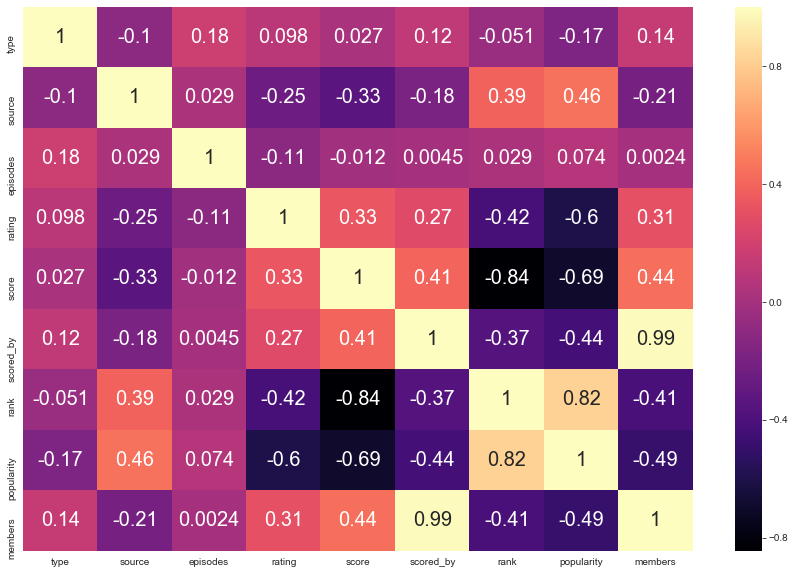

In [11]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(corr, annot = True, annot_kws ={'size':20}, cmap='magma')


### OLM for rank~score

In [13]:
abs(corr).sort_values(by = 'rank',  ascending= False)['rank']
data_reg_simple = ols(formula= "rank~score", data=data_le).fit()
data_reg_simple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rank   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                 1.374e+04
Date:                Wed, 04 Dec 2019   Prob (F-statistic):               0.00
Time:                        13:57:49   Log-Likelihood:                -50565.
No. Observations:                5560   AIC:                         1.011e+05
Df Residuals:                    5558   BIC:                         1.011e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.953e+04    207.622    142.224      0.000    2.91e+04    2.99e+04
score      -3568.8423     30.450   -117.203      0.000   -3628.537   -3509.148
==============================================================================
Omnibus:                     2974.083   Durbin-Watson:                   1.535
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            22826.772
Skew:                           2.481   Prob(JB):                         0.00
Kurtosis:                      11.597   Cond. No.                         50.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### OLM for popularity~rank

In [14]:
abs(corr).sort_values(by = 'popularity',  ascending= False)['popularity']
data_reg_simple = ols(formula= "popularity~rank", data=data_le).fit()
data_reg_simple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                 1.175e+04
Date:                Wed, 04 Dec 2019   Prob (F-statistic):               0.00
Time:                        13:57:49   Log-Likelihood:                -51576.
No. Observations:                5560   AIC:                         1.032e+05
Df Residuals:                    5558   BIC:                         1.032e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    869.9879     58.332     14.914      0.000     755.634     984.341
rank           0.9362      0.009    108.407      0.000       0.919       0.953
==============================================================================
Omnibus:                       44.003   Durbin-Watson:                   1.517
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.936
Skew:                          -0.218   Prob(JB):                     1.75e-10
Kurtosis:                       2.943   Cond. No.                     1.14e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### OLM for score~popularity

In [15]:
abs(corr).sort_values(by = 'score',  ascending= False)['score']
data_reg_simple = ols(formula= "score~popularity", data=data_le).fit()
data_reg_simple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                     4991.
Date:                Wed, 04 Dec 2019   Prob (F-statistic):               0.00
Time:                        13:57:49   Log-Likelihood:                -5817.6
No. Observations:                5560   AIC:                         1.164e+04
Df Residuals:                    5558   BIC:                         1.165e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.6044      0.015    500.376      0.000       7.575       7.634
popularity    -0.0001   2.03e-06    -70.649      0.000      -0.000      -0.000
==============================================================================
Omnibus:                      540.656   Durbin-Watson:                   1.680
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1349.535
Skew:                          -0.569   Prob(JB):                    8.96e-294
Kurtosis:                       5.129   Cond. No.                     1.23e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.23e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### OLM for members~scored_by

In [16]:
abs(corr).sort_values(by = 'members',  ascending= False)['members']
data_reg_simple = ols(formula= "members~scored_by", data=data_le).fit()
data_reg_simple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                members   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                 2.261e+05
Date:                Wed, 04 Dec 2019   Prob (F-statistic):               0.00
Time:                        13:57:49   Log-Likelihood:                -62852.
No. Observations:                5560   AIC:                         1.257e+05
Df Residuals:                    5558   BIC:                         1.257e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7810.6158    281.185     27.778      0.000    7259.384    8361.848
scored_by      1.7143      0.004    475.466      0.000       1.707       1.721
==============================================================================
Omnibus:                     1791.226   Durbin-Watson:                   1.869
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           438585.153
Skew:                           0.034   Prob(JB):                         0.00
Kurtosis:                      46.511   Cond. No.                     8.32e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.32e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Checking the relationships between the different categories

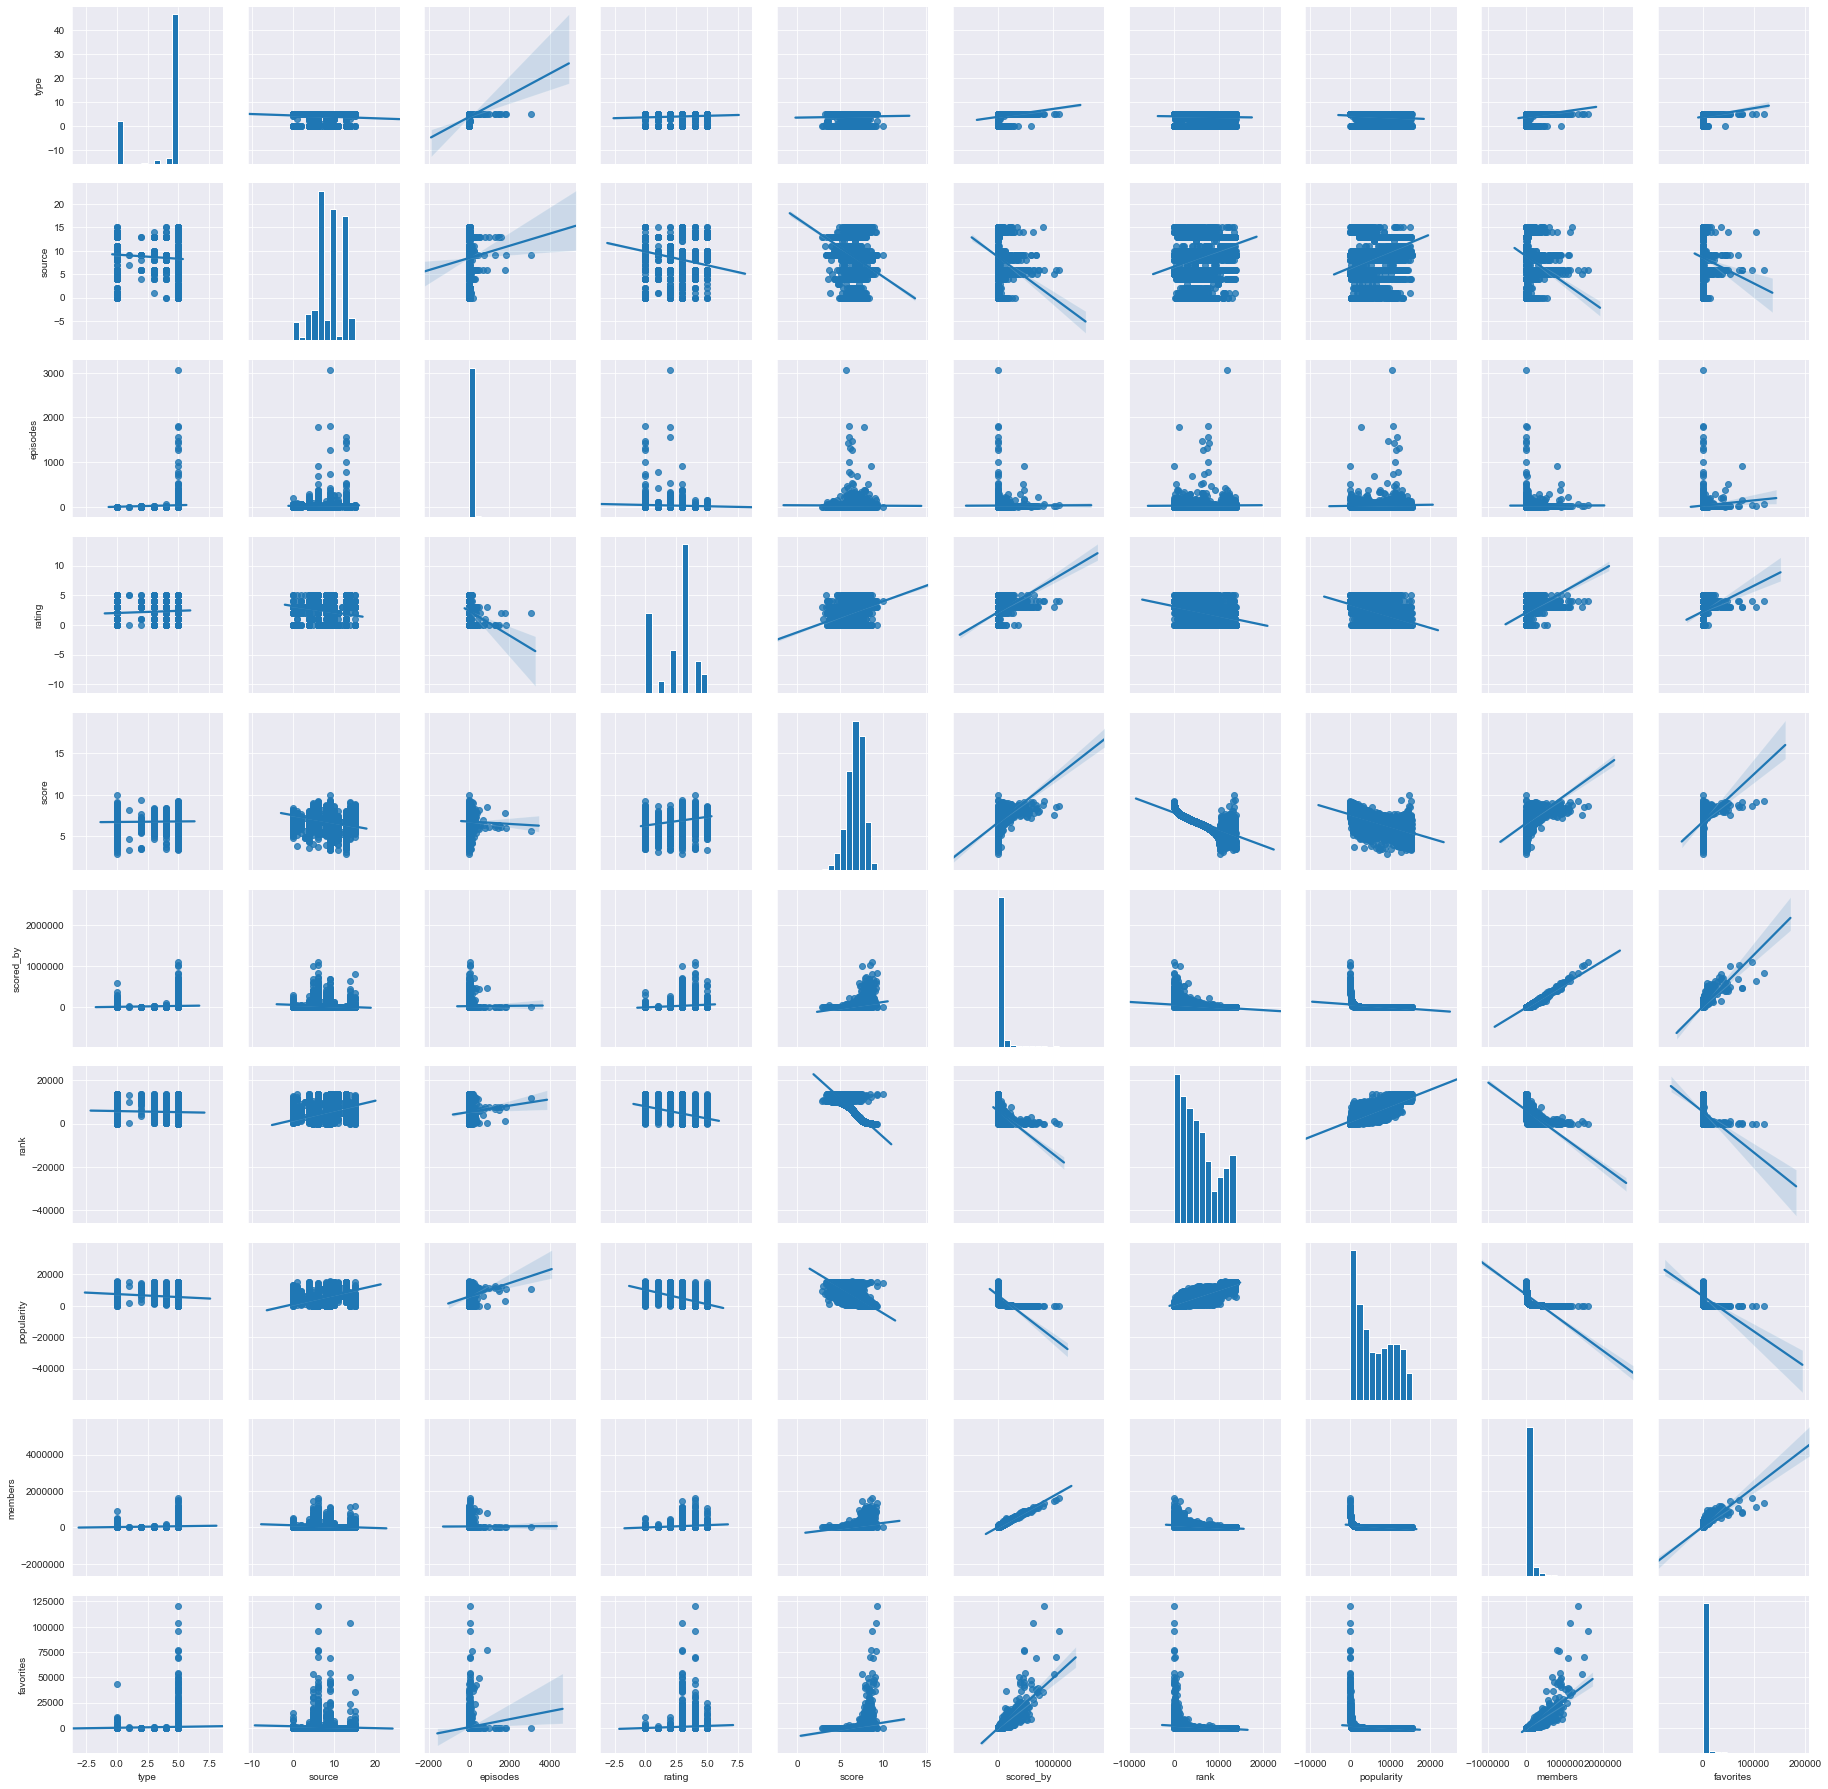

In [17]:
sns.pairplot(data_le, kind='reg' )

Visualizing relationship with each column of my dataset

//anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
//anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


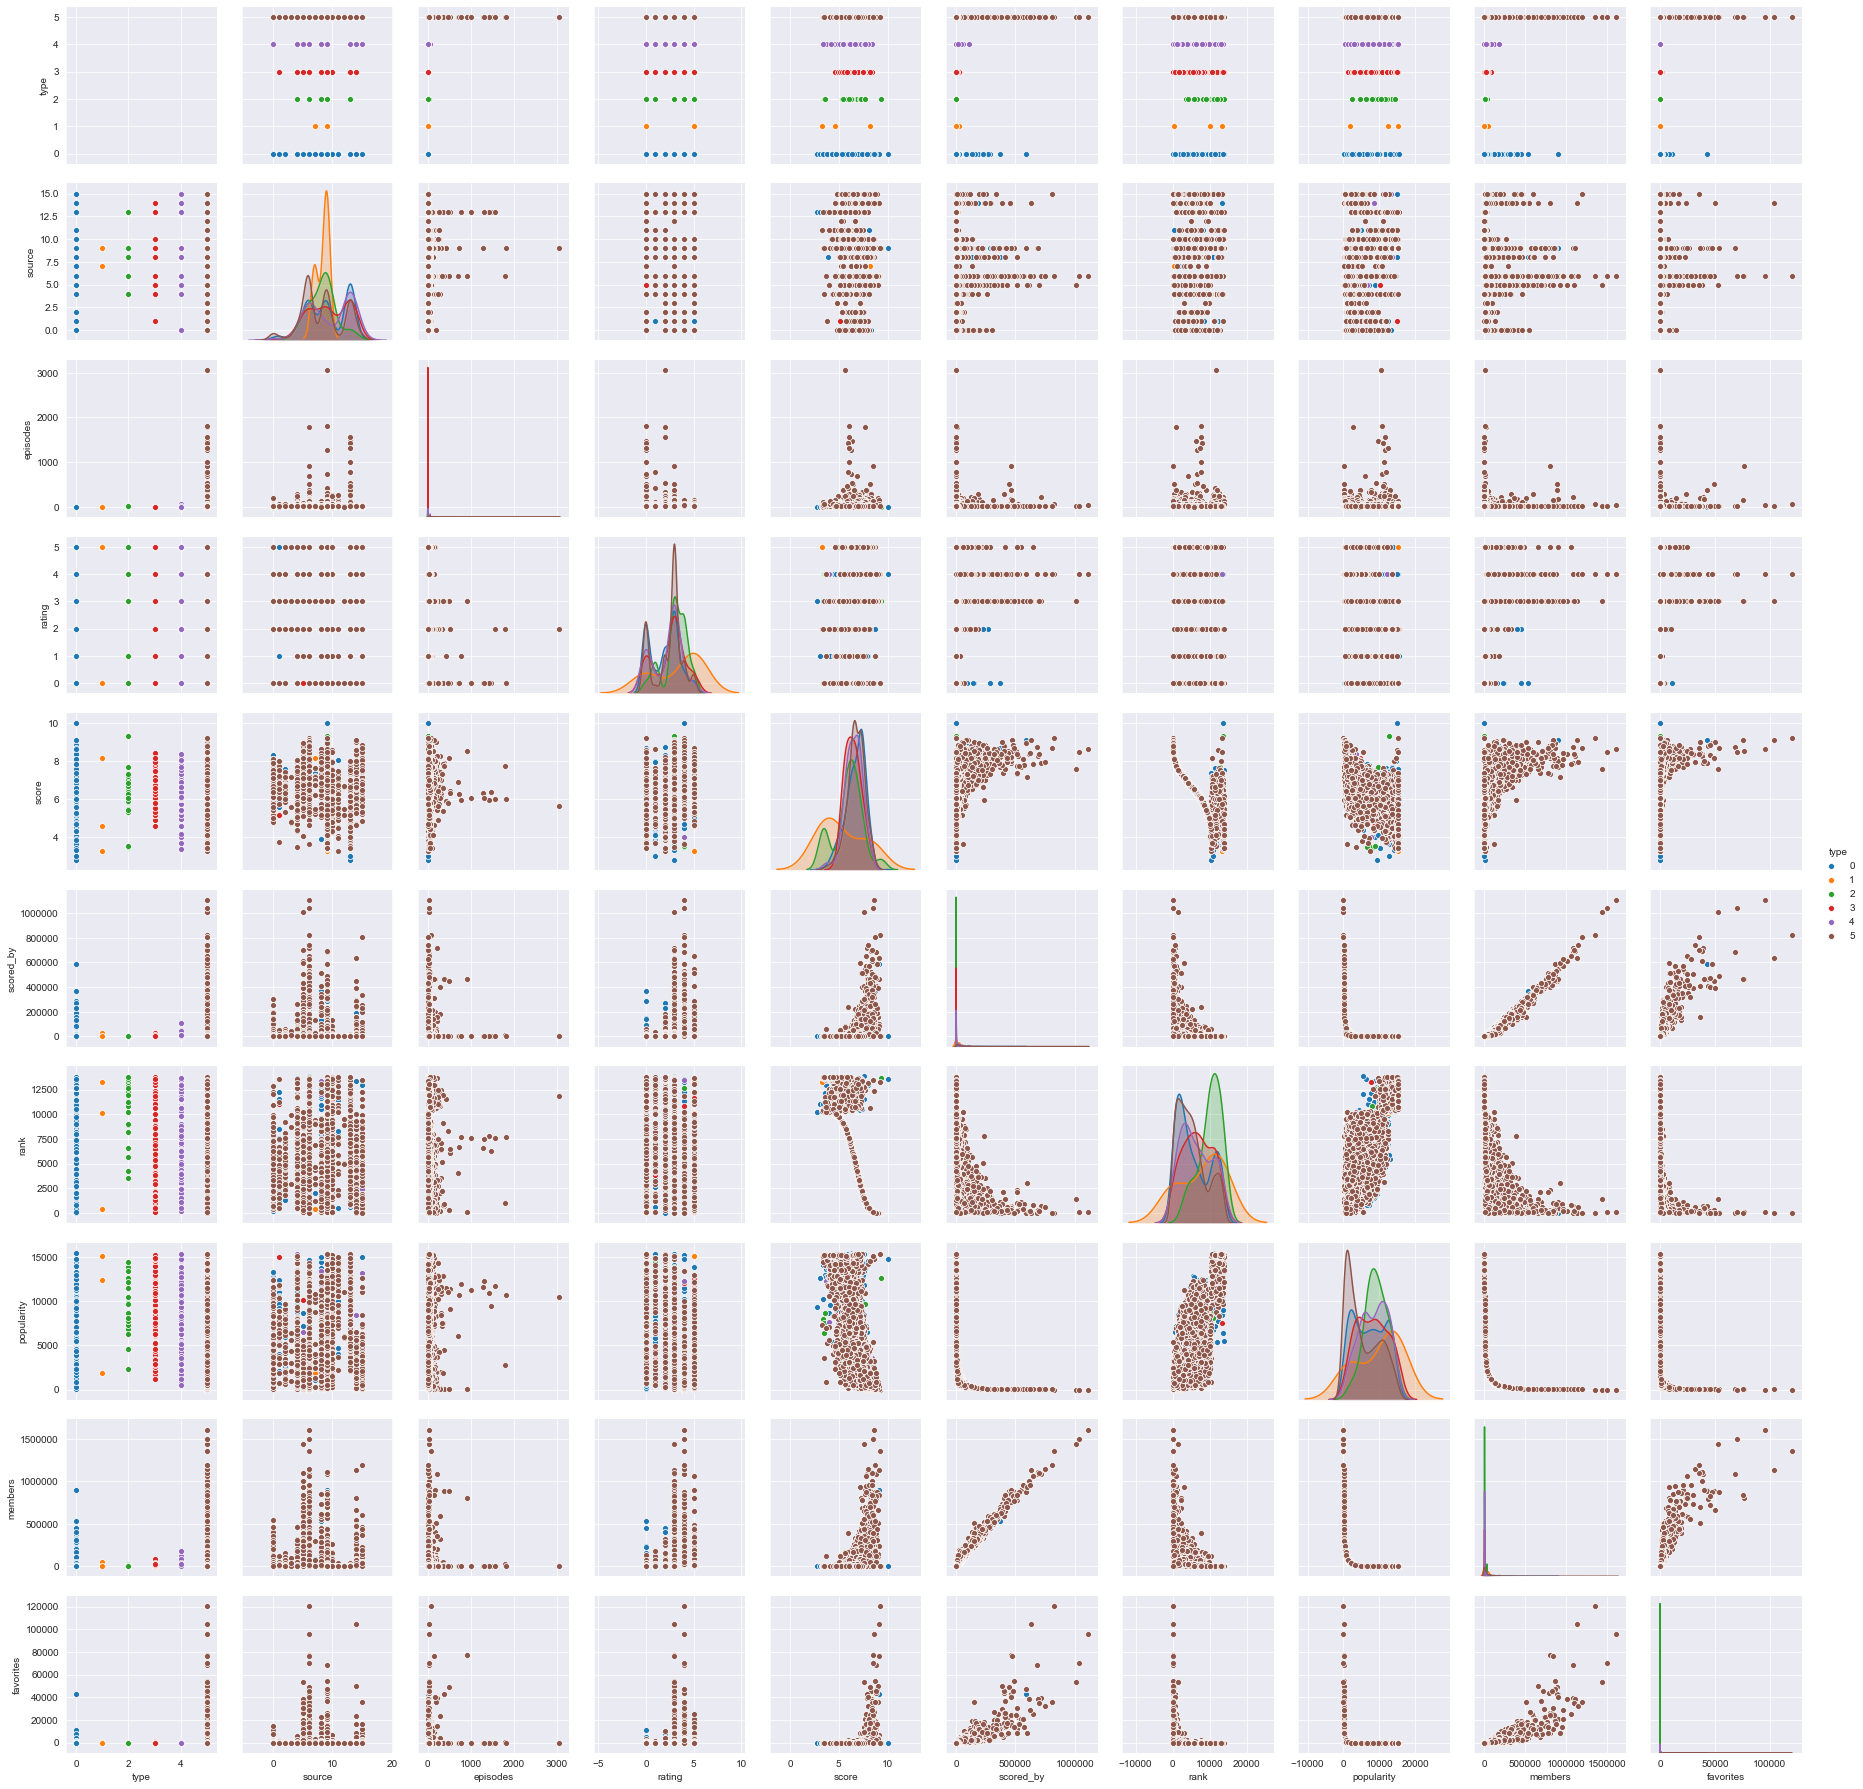

In [18]:
sns.pairplot(data_le, hue ='type')

//anaconda3/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


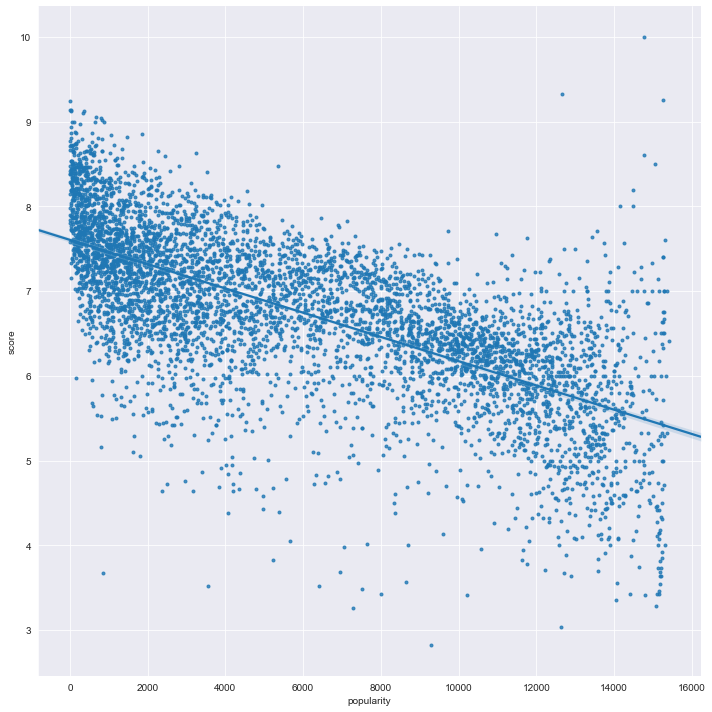

In [19]:

sns.lmplot(x='popularity', y='score', data= data, markers=[ "."], fit_reg =True,size = 10)
# sns.set(rc={'figure.figsize':(100,100)})

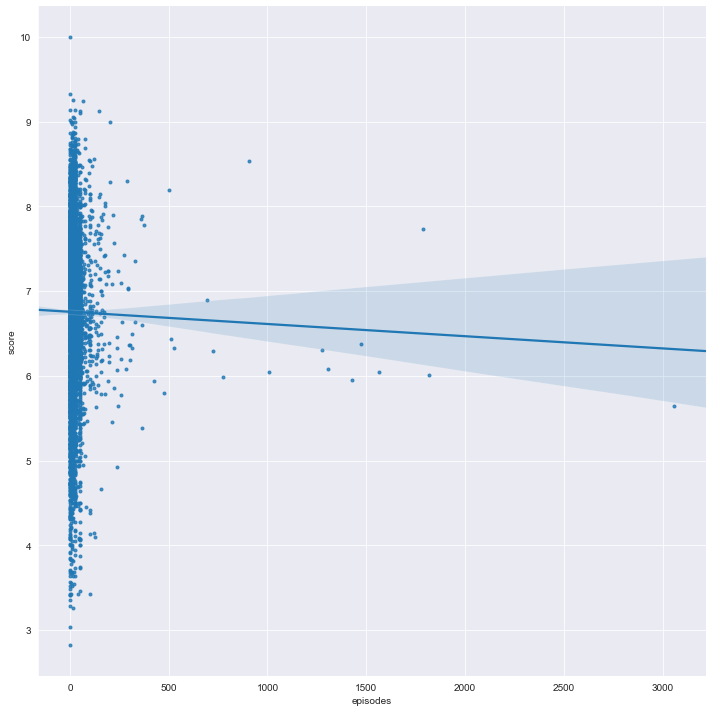

In [20]:
sns.lmplot(x='episodes', y='score', data= data, markers=[ "."], fit_reg =True,size = 10)

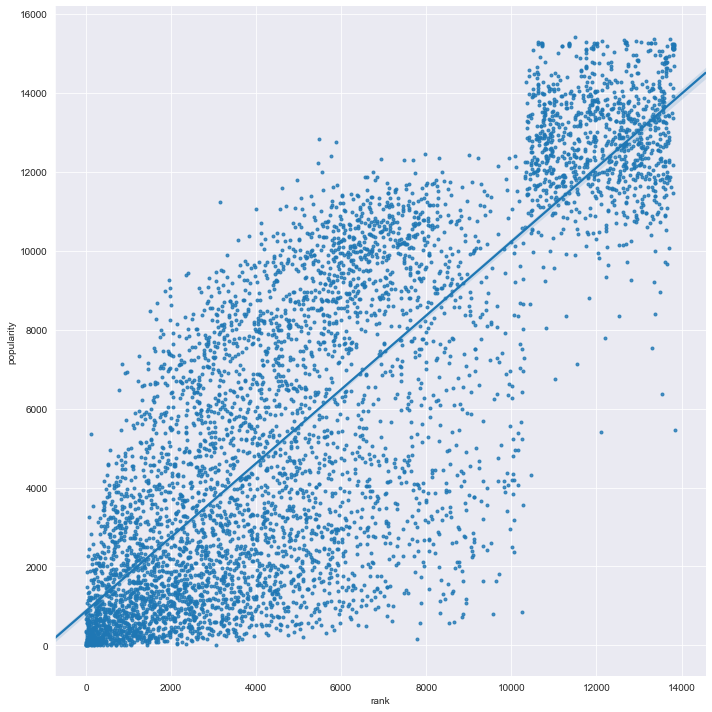

In [21]:
sns.lmplot(x='rank', y='popularity', data= data, markers=["."], fit_reg =True,size = 10)

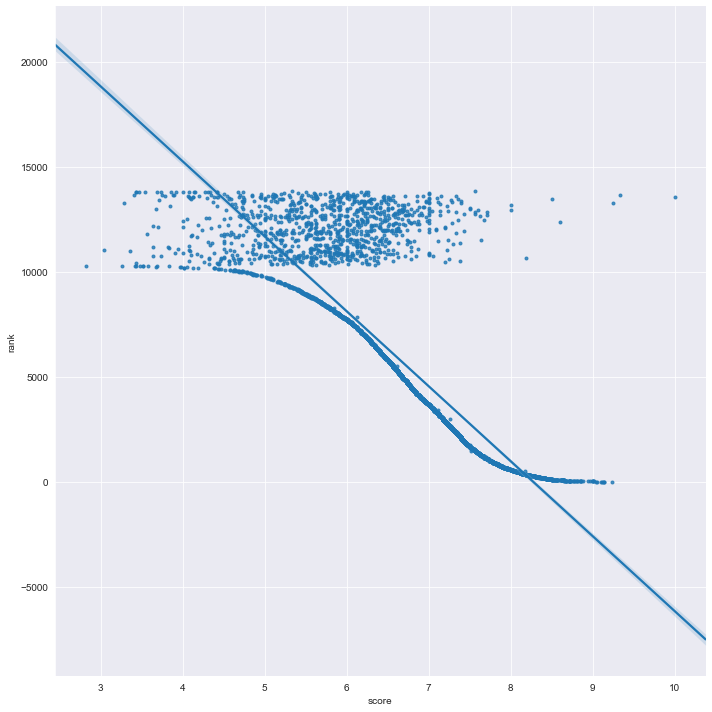

In [22]:
sns.lmplot(x='score', y='rank', data= data, markers=[ "."], fit_reg =True,size = 10)

Box plot of the relationship for type against rank and score

([<matplotlib.axis.XTick at 0x1c26a95748>,
 <a list of 6 Text xticklabel objects>)

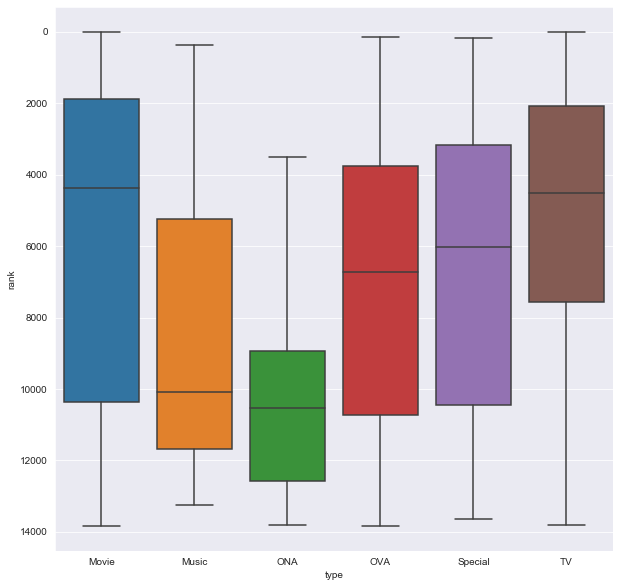

In [23]:
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(data=data_le, x='type' ,y= 'rank', orient='v')
plt.gca().invert_yaxis()
plt.xticks(np.arange(6), ('Movie', 'Music', 'ONA', 'OVA', 'Special','TV'))

([<matplotlib.axis.XTick at 0x1c26b279b0>,
 <a list of 6 Text xticklabel objects>)

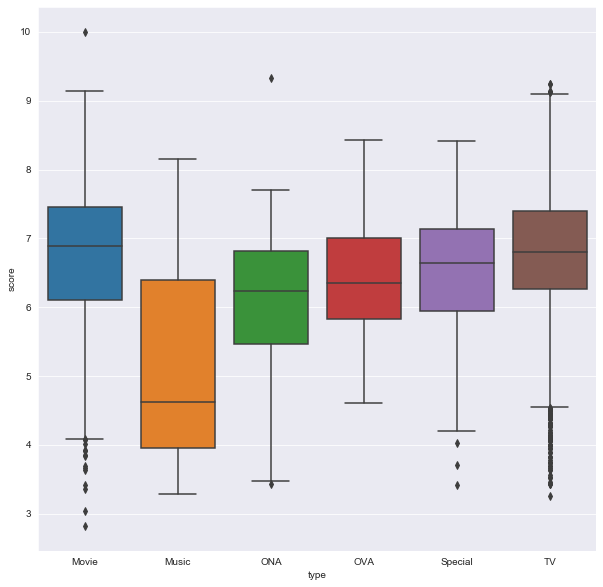

In [24]:
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(data=data_le, x='type' ,y= 'score', orient='v', )
plt.xticks(np.arange(6), ('Movie', 'Music', 'ONA', 'OVA', 'Special','TV'))

Swarmplot of the relationship between the source and score with the different colors showing the rating (where 0 is all ages and brown is R+)

([<matplotlib.axis.XTick at 0x1c27b5f518>,
 <a list of 16 Text xticklabel objects>)

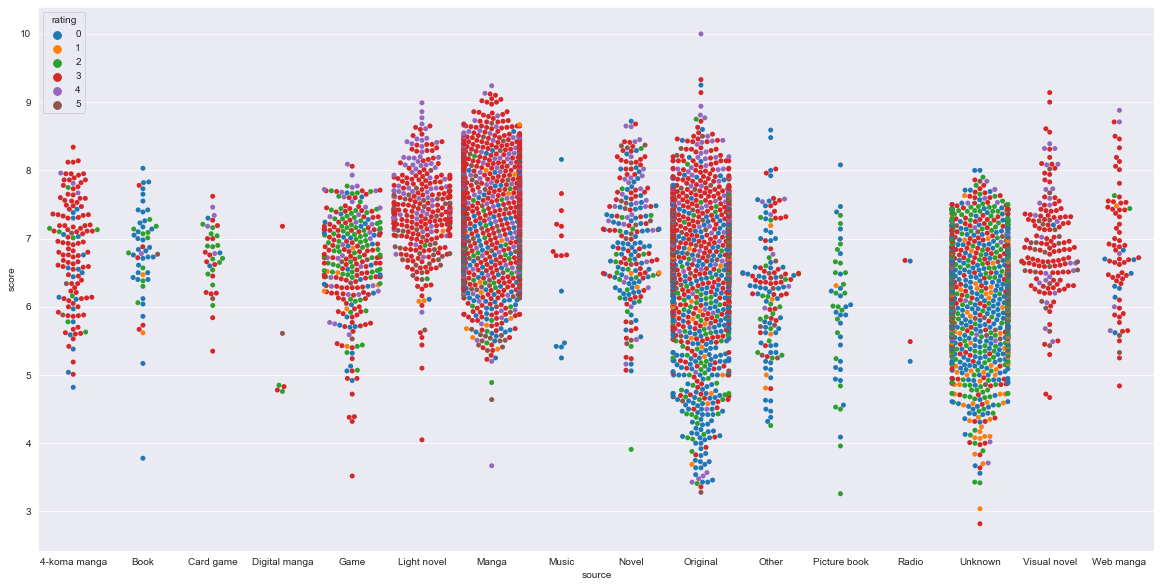

In [25]:
fig, ax = plt.subplots(figsize=(20,10))
sns.swarmplot(data=data_le, x='source' ,y= 'score', size=5, orient='v', hue='rating')
plt.xticks(np.arange(len(data_list_source)), data_list_source)


In [26]:
data.columns

Index(['name', 'type', 'source', 'episodes', 'duration', 'rating', 'score',
       'scored_by', 'rank', 'popularity', 'members', 'favorites'],
      dtype='object')

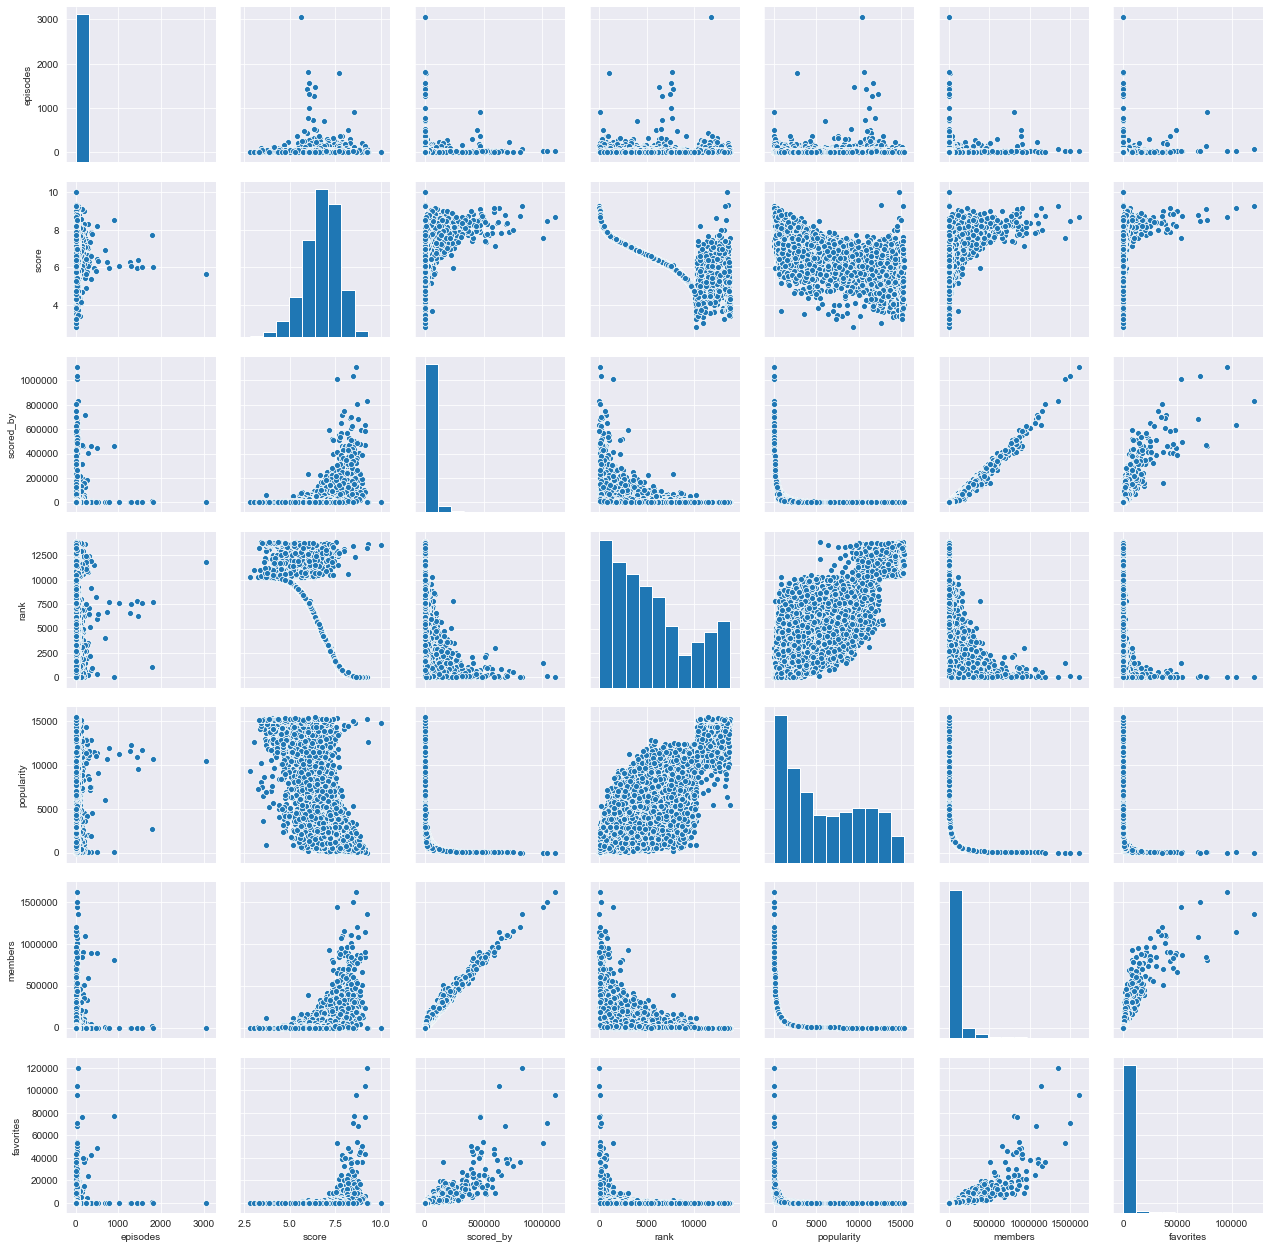

In [27]:
sns.pairplot(data_number_set)

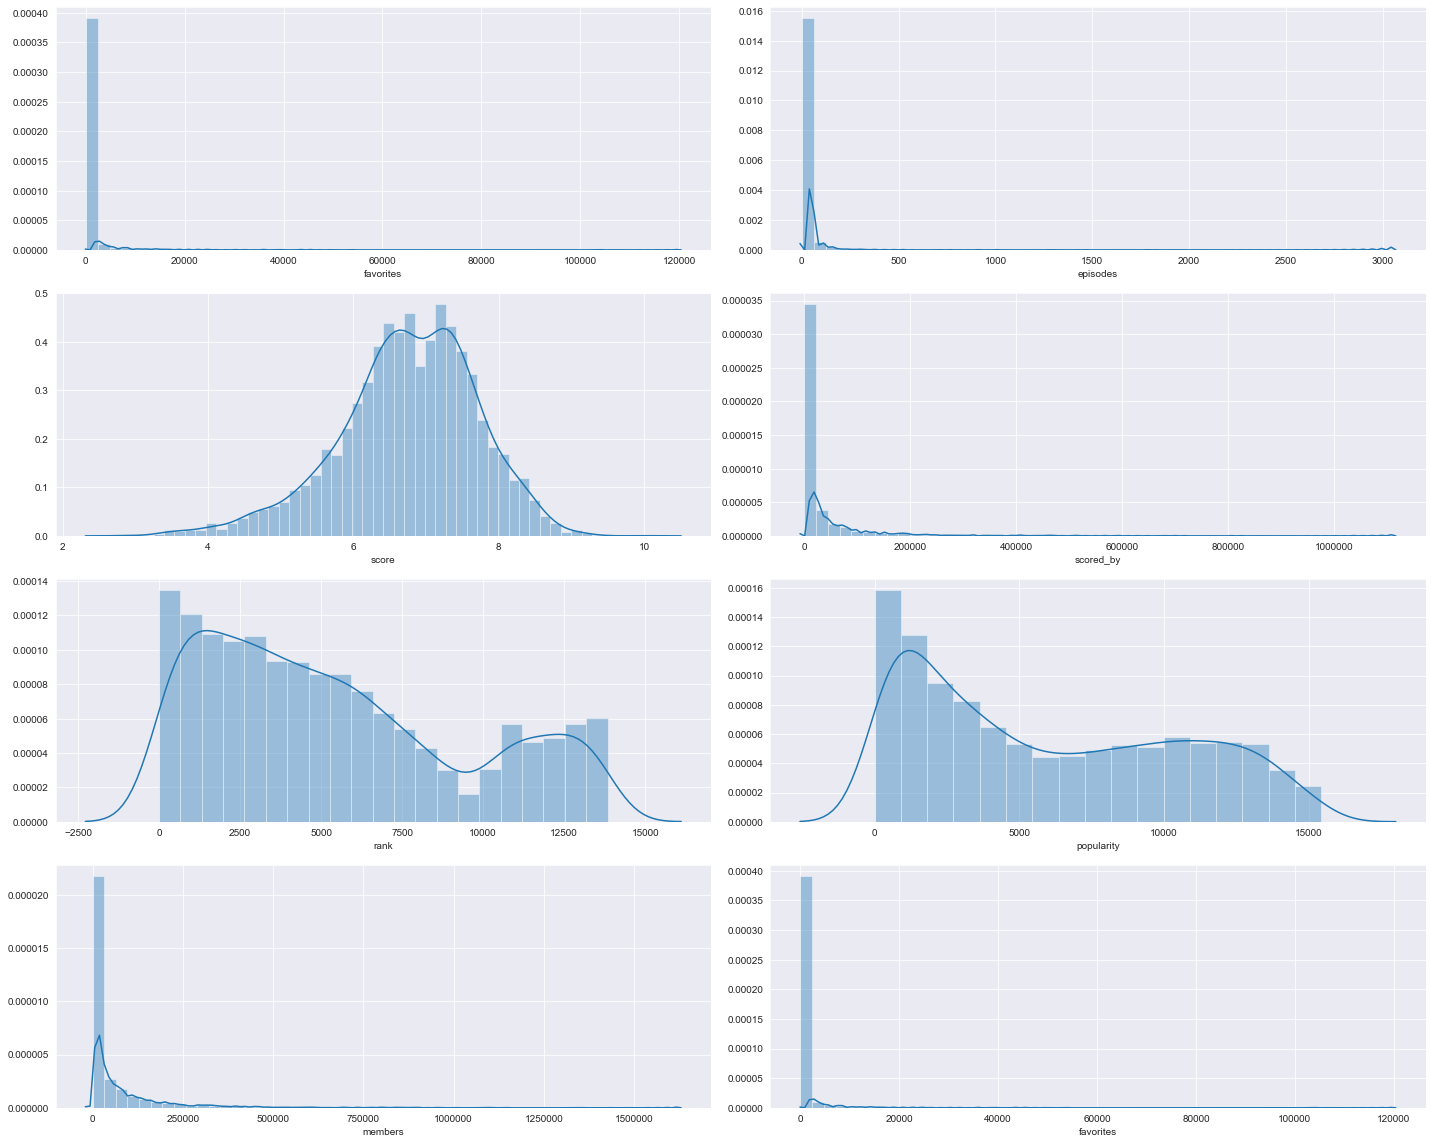

In [28]:
rows = 4
cols = 2
fig, ax = plt.subplots(nrows = rows, ncols = cols, figsize = (20,16))
col = data_number_set.columns
index = -1
for i in range(rows):
    for j in range(cols):
        sns.distplot(data_number_set[col[index]], ax = ax[i][j])
        index = index + 1
plt.tight_layout()

# Total # of Scores vs Total # of Members

### This pairing showed the highest correlation

In [61]:
#selecting the columns in the data and labeling them 
rank=data_le.iloc[:,7]
popularity=data_le.iloc[:,8]
score_by=data_le.iloc[:,6]
score=data_le.iloc[:,5]
members=data_le.iloc[:,9]



X1 = score_by.values.reshape(-1,1)
y1 = members.values.reshape(-1,1)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,test_size=0.3,random_state=3)



In [62]:
#Linear Regression
lr = LinearRegression()
lr.fit(X1_train,y1_train)
y1_pred_lr = lr.predict(X1_test)

lr_accuracy_train = lr.score(X1_train,y1_train)

lr_accuracy_test = lr.score(X1_test,y1_pred_lr)
 
print(f'Linear Regression train accuracy is {lr_accuracy_train} and Linear Regression test accuracy is {lr_accuracy_test}')


Linear Regression train accuracy is 0.9761084201079713 and Linear Regression test accuracy is 1.0


In [63]:
# Ridge Regression
rr = Ridge(alpha=0.01)
rr.fit(X1_train,y1_train)
y1_pred_rr = rr.predict(X1_test)

rr_accuracy_train = rr.score(X1_train,y1_train)

rr_accuracy_test = rr.score(X1_test,y1_pred_rr)
 
print(f'Ridge Regression train accuracy is: {rr_accuracy_train}\nRidge Regression test accuracy is: {rr_accuracy_test}')

rr100 = Ridge(alpha=100)
rr100.fit(X1_train,y1_train)
y1_pred_rr100 = rr100.predict(X1_test)

rr100_accuracy_train = rr100.score(X1_train,y1_train)

rr100_accuracy_test = rr100.score(X1_test,y1_pred_rr100)
 
print(f'Ridge Regression train accuracy is: {rr100_accuracy_train}\nRidge Regression test accuracy is: {rr100_accuracy_test}')



Ridge Regression train accuracy is: 0.9761084201079713
Ridge Regression test accuracy is: 1.0
Ridge Regression train accuracy is: 0.9761084201079713
Ridge Regression test accuracy is: 1.0


In [64]:
# Lasso Regression
lasso01 = Lasso(alpha=0.01)
lasso01.fit(X1_train,y1_train)
y1_pred_lasso01 = lasso01.predict(X1_test)

lasso01_accuracy_train = lasso01.score(X1_train,y1_train)

lasso01_accuracy_test = lasso01.score(X1_test,y1_pred_lasso01)
 
print(f'Lasso Regression @ alpha 0.01 train accuracy is: {lasso01_accuracy_train}\nLasso Regression @ alpha 0.01 test accuracy is: {lasso01_accuracy_test}')

lasso00001 = Lasso(alpha=0.00001)
lasso00001.fit(X1_train,y1_train)
y1_pred_lasso00001 = lasso00001.predict(X1_test)

lasso00001_accuracy_train = lasso00001.score(X1_train,y1_train)

lasso00001_accuracy_test = lasso00001.score(X1_test,y1_pred_lasso00001)
 
print(f'Lasso Regression @ alpha 0.00001 train accuracy is: {lasso00001_accuracy_train}\nLasso Regression @ alpha 0.00001 test accuracy is: {lasso00001_accuracy_test}')


Lasso Regression @ alpha 0.01 train accuracy is: 0.9761084201079713
Lasso Regression @ alpha 0.01 test accuracy is: 1.0
Lasso Regression @ alpha 0.00001 train accuracy is: 0.9761084201079713
Lasso Regression @ alpha 0.00001 test accuracy is: 1.0


In [65]:
#LogisticRegression
logreg= LogisticRegression()
logreg.fit(X1_train,y1_train)
y1_pred_logreg = logreg.predict(X1_test)

logreg_accuracy_train = logreg.score(X1_train,y1_train)

logreg_accuracy_test = logreg.score(y1_test,y1_pred_logreg)
                                              
                                    
print(f'Logistic Regression train accuracy is {logreg_accuracy_train} and Logistic Regression test accuracy is {logreg_accuracy_test}')


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Logistic Regression train accuracy is 0.001541623843782117 and Logistic Regression test accuracy is 0.16486810551558753


In [66]:
# K_nearest Neighbor = 1
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(X1_test, y1_test)
y1_pred_knn = knn.predict(X1_test)


# K_nearest Neighbor = 5 
knn5 = neighbors.KNeighborsClassifier(n_neighbors=5)
knn5.fit(X1_test, y1_test)
y1_pred_knn5 = knn5.predict(X1_test)



knn_accuracy_train = knn.score(y1_train,y1_train)
knn_accuracy_test = knn.score(y1_test,y1_pred_knn)

knn5_accuracy_train = knn5.score(y1_train,y1_train)
knn5_accuracy_test = knn5.score(y1_test,y1_pred_knn)


print(f'K_nearest Neighbor = 1 Regression train accuracy is {knn_accuracy_train}\nK_nearest Neighbor = 1 Regression test accuracy is {knn_accuracy_test}\n')
print(f'K_nearest Neighbor = 5 Regression train accuracy is {knn5_accuracy_train}\nK_nearest Neighbor = 5 Regression test accuracy is {knn5_accuracy_test}')


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


K_nearest Neighbor = 1 Regression train accuracy is 0.0
K_nearest Neighbor = 1 Regression test accuracy is 0.0005995203836930455

K_nearest Neighbor = 5 Regression train accuracy is 0.0
K_nearest Neighbor = 5 Regression test accuracy is 0.0005995203836930455


Not needed but this is used to find the optimal k nearest neighbor from the range specified


In [67]:

# k_range= range(1,10)
# scores= []
# for k in k_range:
#     kknn = neighbors.KNeighborsClassifier(n_neighbors=k)
#     knn.fit(X1, y1)
#     y1_pred_knn = knn.predict(X1_test)
#     scores.append(metrics.accuracy_score(y1_test,y1_pred_knn))
# plt.plot(k_range,scores)


Predicted Model Linear Regression


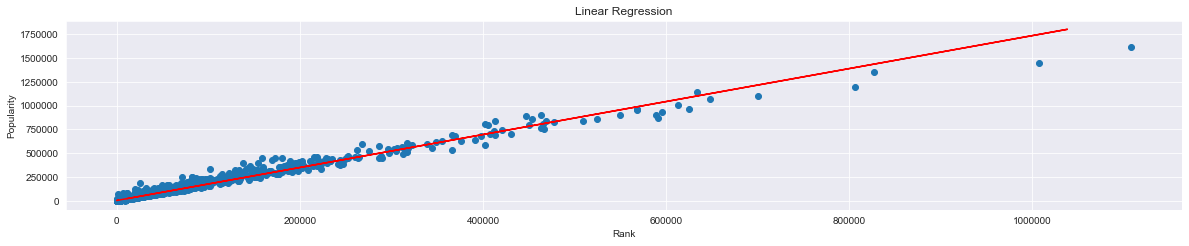

Predicted Model K-nearest Neighbors Regression @ 1


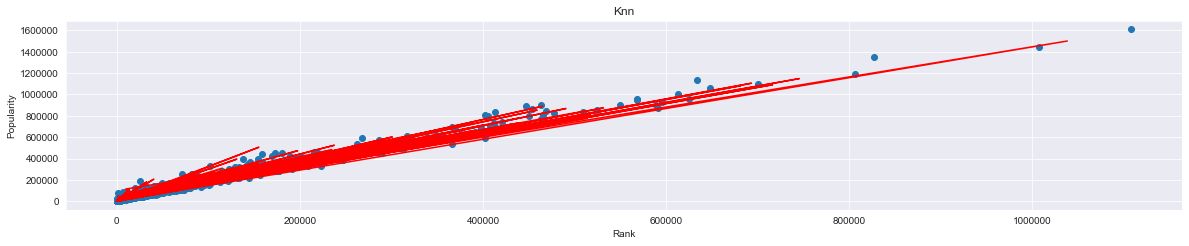

Predicted Model K-nearest Neighbors Regression @ 5


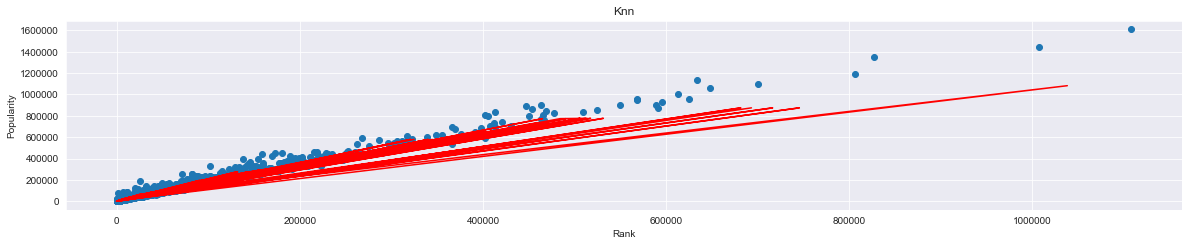

Predicted Model Logistic Regression


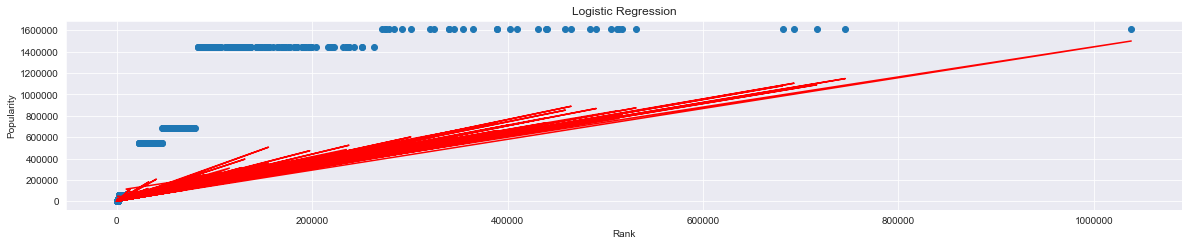

Predicted Model Ridge Regression


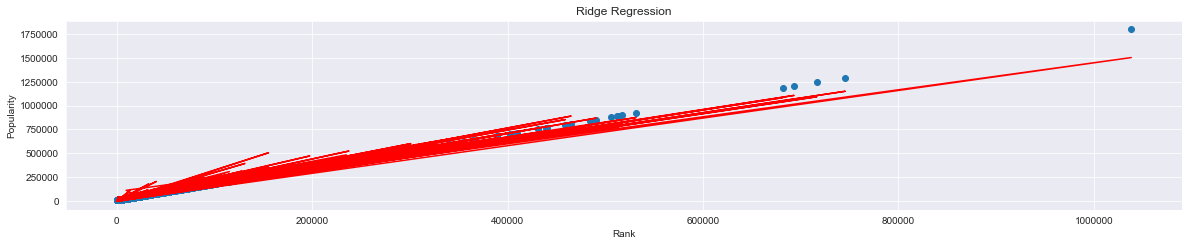

Predicted Model Lasso Regression


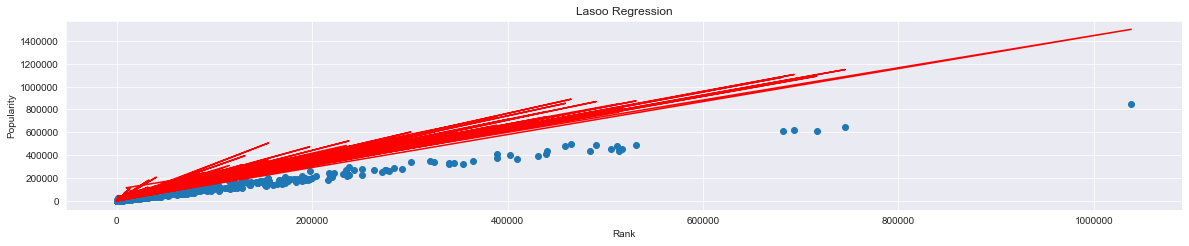

In [87]:
# ploting Linear Regression model

print('Predicted Model Linear Regression')

fig1 = plt.figure(figsize=(20,16))
ax1 = fig1.add_subplot(413)
plt.scatter(X1_train,y1_train)
plt.plot(X1_test,y1_pred_lr, color = 'r')
plt.xlabel('Rank')
plt.ylabel('Popularity')
plt.title('Linear Regression')
plt.show()

# ploting Knn model Neighbor=1

print('Predicted Model K-nearest Neighbors Regression @ 1')

fig1 = plt.figure(figsize=(20,16))
ax1 = fig1.add_subplot(412)
plt.scatter(X1_train,y1_train)
plt.plot(X1_test,y1_pred_knn, color = 'r')
plt.xlabel('Rank')
plt.ylabel('Popularity')
plt.title('Knn')
plt.show()


# ploting Knn model Neighbor=5

print('Predicted Model K-nearest Neighbors Regression @ 5')

fig1 = plt.figure(figsize=(20,16))
ax1 = fig1.add_subplot(412)
plt.scatter(X1_train,y1_train)
plt.plot(X1_test,y1_pred_knn5, color = 'r')
plt.xlabel('Rank')
plt.ylabel('Popularity')
plt.title('Knn')
plt.show()


# ploting Ridge Regression model

print('Predicted Model Logistic Regression')

fig1 = plt.figure(figsize=(20,16))
ax1 = fig1.add_subplot(414)
plt.scatter(X1_test,y1_pred_logreg)
plt.plot(X1_test,y1_test, color = 'r')
plt.xlabel('Rank')
plt.ylabel('Popularity')
plt.title('Logistic Regression')
plt.show()

# ploting Ridge Regression model

print('Predicted Model Ridge Regression')

fig1 = plt.figure(figsize=(20,16))
ax1 = fig1.add_subplot(414)
plt.scatter(X1_test,y1_pred_rr)
plt.plot(X1_test,y1_test, color = 'r')
plt.xlabel('Rank')
plt.ylabel('Popularity')
plt.title('Ridge Regression')
plt.show()

# ploting Lasoo Regression model

print('Predicted Model Lasso Regression')

fig1 = plt.figure(figsize=(20,16))
ax1 = fig1.add_subplot(414)
plt.scatter(X1_test,y1_pred_lasso)
plt.plot(X1_test,y1_test, color = 'r')
plt.xlabel('Rank')
plt.ylabel('Popularity')
plt.title('Lasoo Regression')
plt.show()


# Rank against total number of scores

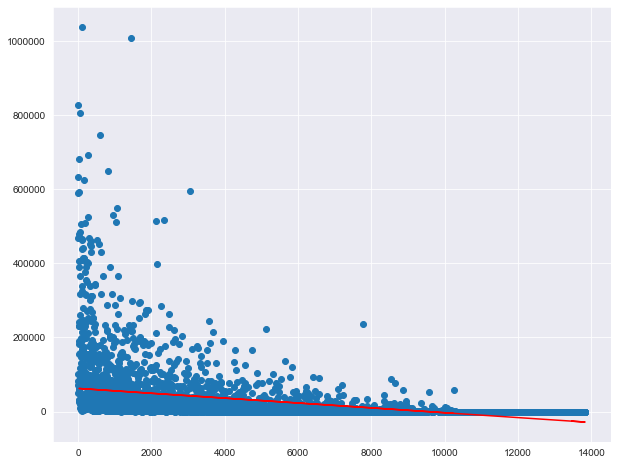

In [81]:
score_by=data.iloc[:,7]

fig2 = plt.figure(figsize=(10,8))
ax2 = fig2.add_subplot(111)
X2 = rank.values.reshape(-1,1)
y2 = score_by.values.reshape(-1,1)


X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,test_size=0.2)
lr.fit(X2_train,y2_train)
y2_pred_lr = lr.predict(X2_test)


plt.scatter(X2_train,y2_train)
plt.plot(X2_test,y2_pred_lr, color = 'r')
plt.show()

In [78]:
accuracy = lr.score(y2_test,y2_pred)
accuracy

-20.217936689087256

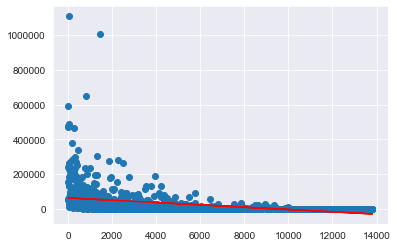

In [73]:
# Linear Regression Model plot

plt.scatter(X2_test,y2_test)
plt.plot(X2_test,y2_pred_lr, color = 'r')
plt.show()

In [75]:
# Ridge Regression
rr_2 = Ridge(alpha=0.01)
rr_2.fit(X2_train,y2_train)
y2_pred_rr = rr_2.predict(X2_test)

rr_accuracy_train2 = rr_2.score(X2_train,y2_train)

rr_accuracy_test2 = rr_2.score(X2_test,y2_pred_rr)
 
print(f'Ridge Regression train accuracy is: {rr_accuracy_train2}\nRidge Regression test accuracy is: {rr_accuracy_test2}')

rr100_2 = Ridge(alpha=100)
rr100_2.fit(X2_train,y2_train)
y2_pred_rr100 = rr100_2.predict(X2_test)

rr100_accuracy_train2 = rr100_2.score(X2_train,y2_train)

rr100_accuracy_test2 = rr100_2.score(X2_test,y2_pred_rr100)
 
print(f'Ridge Regression train accuracy is: {rr100_accuracy_train2}\nRidge Regression test accuracy is: {rr100_accuracy_test2}')



Ridge Regression train accuracy is: 0.13552000995805213
Ridge Regression test accuracy is: 1.0
Ridge Regression train accuracy is: 0.13552000995805213
Ridge Regression test accuracy is: 1.0


In [76]:
# Lasso Regression
lasso01_2 = Lasso(alpha=0.01)
lasso01_2.fit(X2_train,y2_train)
y2_pred_lasso01 = lasso01_2.predict(X2_test)

lasso01_accuracy_train_2 = lasso01_2.score(X2_train,y2_train)

lasso01_accuracy_test_2 = lasso01_2.score(X2_test,y2_pred_lasso01)
 
print(f'Lasso Regression @ alpha 0.01 train accuracy is: {lasso01_accuracy_train_2}\nLasso Regression @ alpha 0.01 test accuracy is: {lasso01_accuracy_test_2}')

lasso00001_2 = Lasso(alpha=0.00001)
lasso00001_2.fit(X2_train,y2_train)
y2_pred_lasso00001 = lasso00001_2.predict(X2_test)

lasso00001_accuracy_train_2 = lasso00001_2.score(X2_train,y2_train)

lasso00001_accuracy_test_2 = lasso00001_2.score(X2_test,y2_pred_lasso00001)
 
print(f'Lasso Regression @ alpha 0.00001 train accuracy is: {lasso00001_accuracy_train_2}\nLasso Regression @ alpha 0.00001 test accuracy is: {lasso00001_accuracy_test_2}')


Lasso Regression @ alpha 0.01 train accuracy is: 0.13552000995805202
Lasso Regression @ alpha 0.01 test accuracy is: 1.0
Lasso Regression @ alpha 0.00001 train accuracy is: 0.13552000995805213
Lasso Regression @ alpha 0.00001 test accuracy is: 1.0


In [77]:
#LogisticRegression
logreg_2= LogisticRegression()
logreg_2.fit(X2_train,y2_train)
y2_pred_logreg = logreg.predict(X2_test)

logreg_accuracy_train_2 = logreg_2.score(X2_train,y2_train)

logreg_accuracy_test_2 = logreg_2.score(y2_test,y2_pred_logreg)
                                              
                                    
print(f'Logistic Regression train accuracy is {logreg_accuracy_train_2} and Logistic Regression test accuracy is {logreg_accuracy_test_2}')


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Logistic Regression train accuracy is 0.010566546762589928 and Logistic Regression test accuracy is 0.0


Predicted Model Linear Regression


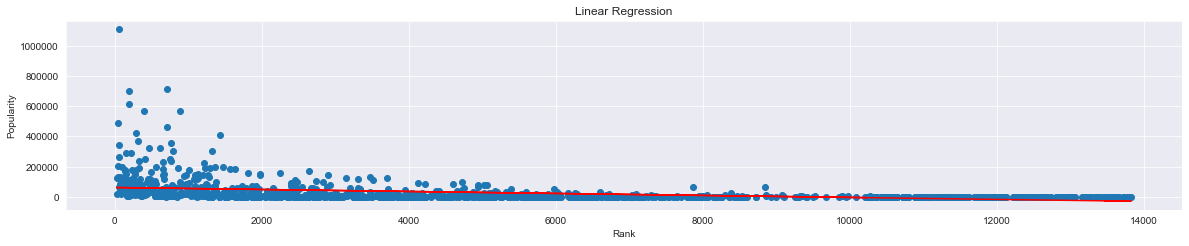

Predicted Model Logistic Regression


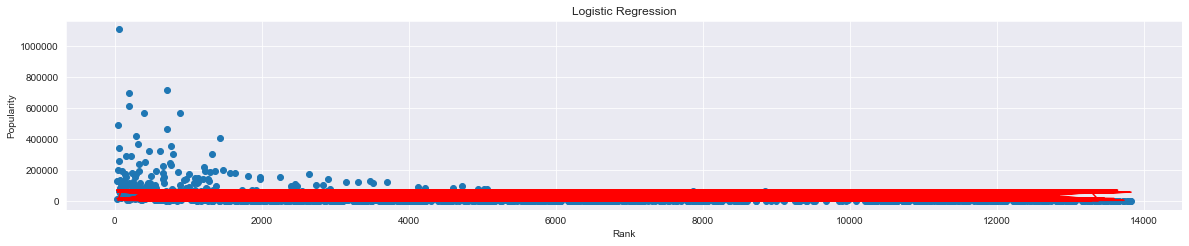

Predicted Model Ridge Regression


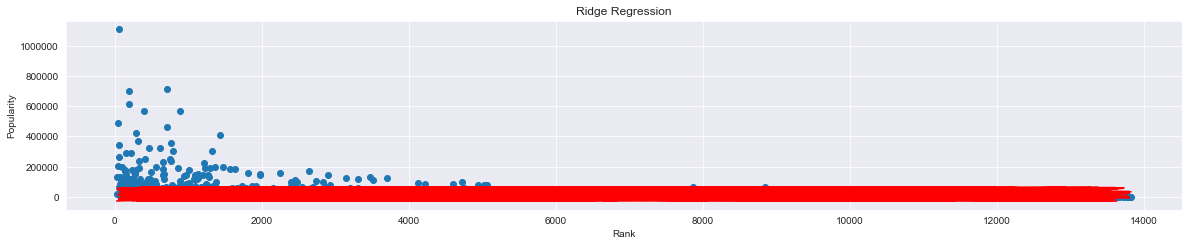

Predicted Model Lasso Regression


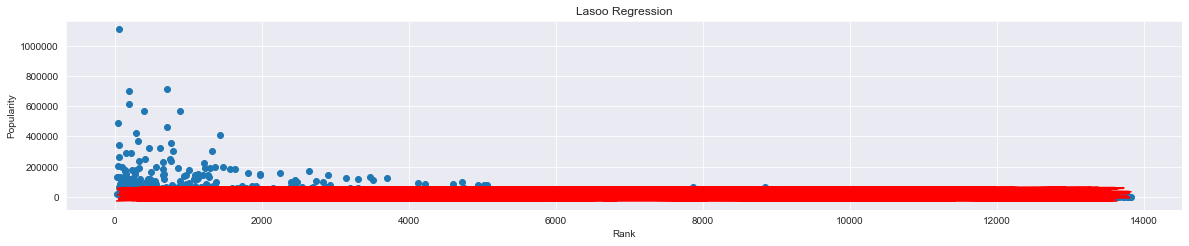

In [89]:
# ploting Linear Regression model

print('Predicted Model Linear Regression')

fig2 = plt.figure(figsize=(20,16))
ax2 = fig2.add_subplot(413)
plt.scatter(X2_test,y2_test)
plt.plot(X2_test,y2_pred_lr, color = 'r')
plt.xlabel('Rank')
plt.ylabel('Popularity')
plt.title('Linear Regression')
plt.show()


# ploting Ridge Regression model

print('Predicted Model Logistic Regression')

fig2 = plt.figure(figsize=(20,16))
ax2 = fig2.add_subplot(414)
plt.scatter(X2_test,y2_test)
plt.plot(X2_test,y2_pred_logreg, color = 'r')
plt.xlabel('Rank')
plt.ylabel('Popularity')
plt.title('Logistic Regression')
plt.show()

# ploting Ridge Regression model

print('Predicted Model Ridge Regression')

fig2 = plt.figure(figsize=(20,16))
ax2 = fig2.add_subplot(414)
plt.scatter(X2_test,y2_test)
plt.plot(X2_test,y2_pred_rr, color = 'r')
plt.xlabel('Rank')
plt.ylabel('Popularity')
plt.title('Ridge Regression')
plt.show()

# ploting Lasoo Regression model

print('Predicted Model Lasso Regression')

fig2 = plt.figure(figsize=(20,16))
ax2 = fig2.add_subplot(414)
plt.scatter(X2_test,y2_test)
plt.plot(X2_test,y2_pred_lasso01, color = 'r')
plt.xlabel('Rank')
plt.ylabel('Popularity')
plt.title('Lasoo Regression')
plt.show()

# Rank to Popularity

In [ ]:
data_le

In [ ]:


fig3 = plt.figure(figsize=(10,8))
ax3 = fig3.add_subplot(111)
x3 = rank.values.reshape(-1,1)
y3 = popularity.values.reshape(-1,1)

lr.fit(x3,y3)
y_pred3 = lr.predict(x3)

plt.scatter(x3,y3)
plt.plot(x3,y_pred3, color = 'r')
plt.show()

In [ ]:
#Linear Regression
lr = LinearRegression()
lr.fit(x3_test,y3_test)
y3_pred_lr = lr.predict(x3_test)


In [ ]:
#LogisticRegression
logreg= LogisticRegression()
logreg.fit(x3_test,y3_test)
y3_pred_logreg = logreg.predict(x3_test)
print(metrics.accuracy_score(y3_test,y3_pred_logreg))

In [ ]:
# K_nearest Neighbor = 1
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(x3_test, y3_test)
y3_pred_knn = knn.predict(x3_test)
print(metrics.accuracy_score(y3_test,y3_pred_knn))

In [ ]:
# K_nearest Neighbor = 5 
knn5 = neighbors.KNeighborsClassifier(n_neighbors=1)
knn5.fit(x3_test, y3_test)
y3_pred_knn5 = knn5.predict(x3_test)
print(metrics.accuracy_score(y3_test,y3_pred_knn5))

In [ ]:
k_range= range(1,25)
scores= []
for k in k_range:
    kknn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(X1, y1)
    y1_pred_knn = knn.predict(X1_test)
    scores.append(metrics.accuracy_score(y1_test,y1_pred_knn))
plt.plot(k_range,scores)


In [ ]:
# ploting testing model

fig3 = plt.figure(figsize=(20,16))
ax3 = fig1.add_subplot(413)
plt.scatter(x3_train,y3_train)
plt.plot(x3_test,y3_pred_lr, color = 'r')
plt.xlabel('Rank')
plt.ylabel('Popularity')
plt.title('Linear Regression')
plt.show()

# ploting Knn model Neighbor=1

fig3 = plt.figure(figsize=(20,16))
ax3 = fig1.add_subplot(412)
plt.scatter(x3_train,y3_train)
plt.plot(x3_test,y3_pred_knn, color = 'r')
plt.xlabel('Rank')
plt.ylabel('Popularity')
plt.title('Knn')
plt.show()


# ploting Knn model Neighbor=5

fig3 = plt.figure(figsize=(20,16))
ax3 = fig1.add_subplot(412)
plt.scatter(x3_train,y3_train)
plt.plot(x3_test,y3_pred_knn5, color = 'r')
plt.xlabel('Rank')
plt.ylabel('Popularity')
plt.title('Knn')
plt.show()


# ploting predicted model

print('Predicted Model Log')

fig3 = plt.figure(figsize=(20,16))
ax3 = fig1.add_subplot(414)
plt.scatter(x3_train,y3_train)
plt.plot(x3_test,y3_test, color = 'r')
plt.xlabel('Rank')
plt.ylabel('Popularity')
plt.title('Logistic Regression')
plt.show()

In [ ]:
x3_train, x3_test, y3_train, y3_test = train_test_split(x3,y3,test_size=0.25)
lr.fit(x3_train,y3_train)
lr.predict(x3_test)
accuracy = lr.score(x3_test,y3_test)
accuracy

# Rank to Score

In [ ]:

x4 = rank.values.reshape(-1,1)
y4 = score.values.reshape(-1,1)

lr.fit(x4,y4)
y_pred4 = lr.predict(x4)


fig4 = plt.figure(figsize=(10,8))
ax4 = fig4.add_subplot(111)
plt.scatter(x4,y4)
plt.plot(x4,y_pred4, color = 'r')
# plt.xlim(15000,-10)
# plt.ylim(0,370000)
plt.show()

In [ ]:
x4_train, x4_test, y4_train, y4_test = train_test_split(x4,y4,test_size=0.25)
lr.fit(x4_train,y4_train)
lr.predict(x4_test)
accuracy = lr.score(x4_test,y4_test)
accuracy